In [1]:
rm(list = ls())
options(stringsAsFactors = F)
gc()
library(future)
library(RColorBrewer)
library(viridis)
library(Seurat)
library(harmony)
library(tidyverse)
library(patchwork)
library(ggplot2)
library(cowplot)
library(dplyr)
library(data.table)
library(reticulate)
scanpy <- import("scanpy")
pandas <- import("pandas")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,603119,32.3,1276062,68.2,1276062,68.2
Vcells,1082109,8.3,8388608,64.0,1649345,12.6


Warning message:
"程辑包'future'是用R版本4.1.3 来建造的"
Warning message:
"程辑包'RColorBrewer'是用R版本4.1.3 来建造的"
Warning message:
"程辑包'viridis'是用R版本4.1.3 来建造的"
载入需要的程辑包：viridisLite

Warning message:
"程辑包'viridisLite'是用R版本4.1.3 来建造的"
Warning message:
"程辑包'Seurat'是用R版本4.1.3 来建造的"
Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

Warning message:
"程辑包'harmony'是用R版本4.1.3 来建造的"
载入需要的程辑包：Rcpp

Warning message:
"程辑包'Rcpp'是用R版本4.1.3 来建造的"
Warning message:
"程辑包'tidyverse'是用R版本4.1.3 来建造的"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"程辑包'ggplot2'是用R版本4.1.3 来建造的"
Warning message:
"程辑包'tibble'是用R版本4.1.3 来建造的"
Warning message:
"程辑包'tidyr'是用R版本4.1.3 来建造的"
Warning message:
"程辑包'readr'是用R版本4.1.3 来建造的"
Warning

In [2]:
adata = scanpy$read('./cache/scRNA_cnv.h5ad')
exprs <- t(adata$X)
colnames(exprs) <- adata$obs_names$to_list()
rownames(exprs) <- adata$var_names$to_list()
scRNA <- CreateSeuratObject(exprs)
# Set the expression assay
scRNA <- SetAssayData(scRNA, "data", exprs)
# Add observation metadata
scRNA <- AddMetaData(scRNA,adata$obs)
embedding <- adata$obsm["X_umap"]
rownames(embedding) <- adata$obs_names$to_list()
colnames(embedding) <- c("umap_1", "umap_2")
scRNA[["umap"]] <- CreateDimReducObject(embedding, key = "umap_")

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is n_genesIDSampleTissuemetastasis_statuspercent_mitobatchn_countslog_countsdoublet_scorespredicted_doubletsdoublet_infocluster_0.1cluster_0.2cluster_0.3cluster_0.4cluster_0.5cluster_0.6cluster_0.7cluster_0.8cluster_0.9cluster_1.0cluster_1.1cluster_1.2cluster_1.3cluster_1.4cluster_1.5barcodecell.typecnv_leidencnv_scorecnv_status; see ?make.names for more details on syntax validity"
Warning message:
"No assay specified, setting assay as RNA by default."


In [30]:
allcolour <- c("#FF6600", "#003366","#0066CC",
               "#00CC33", "#660066", "#FF0066",
               "#FF9900", "#6600CC", "#6699FF",
               "#CCFF00", "#FF0033")
options(repr.plot.width = 18, repr.plot.height = 8)

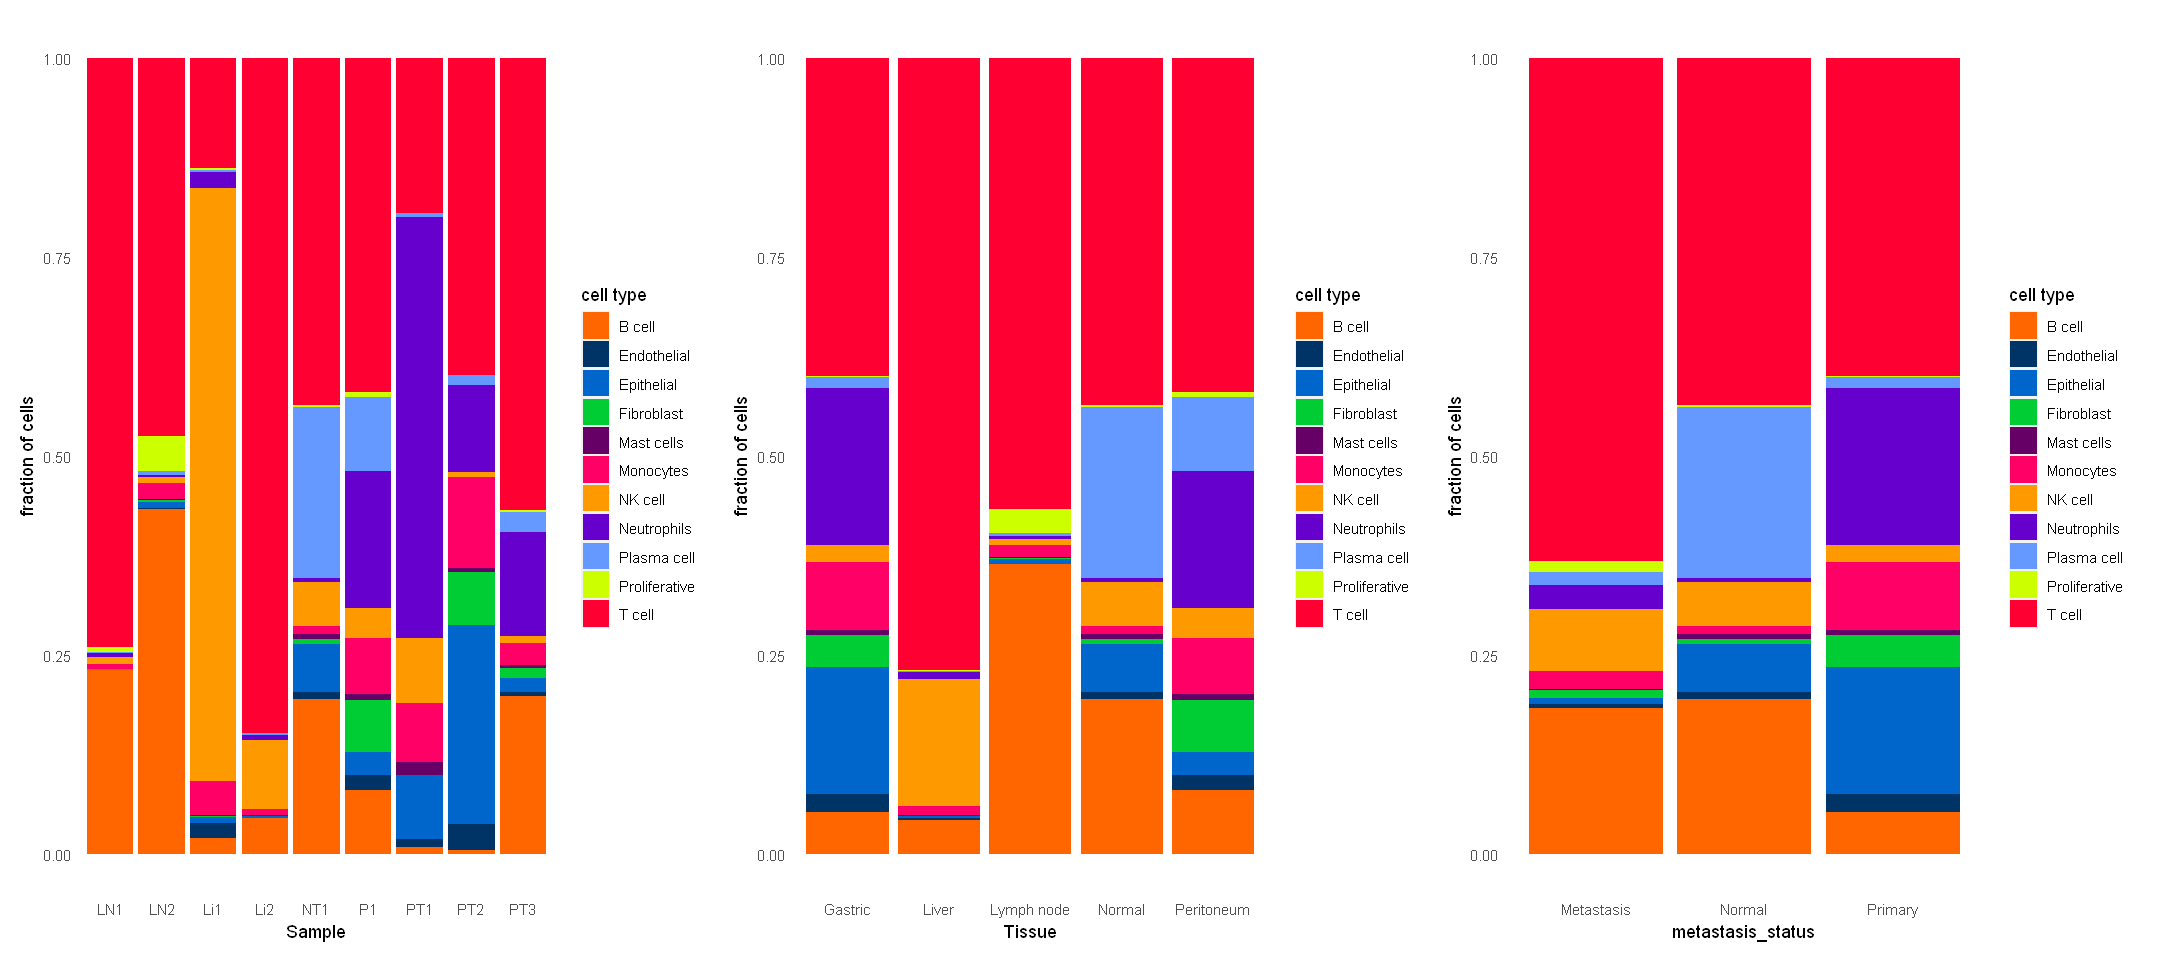

In [31]:
A <- scRNA@meta.data
match_celltype_levels <- c('B cell', 'Endothelial', 'Epithelial', 'Fibroblast',
                            'Mast cells', 'Monocytes','NK cell','Neutrophils',
                           'Plasma cell','Proliferative','T cell')
a <- A%>%
  group_by(Sample) %>%
  mutate(celltype = factor(cell.type,levels = match_celltype_levels)) %>%
  arrange(celltype)
p1 = ggplot() +
  geom_bar(data = a, aes(x = Sample, fill = factor(celltype)), position = position_fill(reverse = TRUE)) +
  scale_fill_manual(values = allcolour) +
  labs(fill = "cell type", y = "fraction of cells")+
  theme(panel.grid.major = element_blank(), #主网格线
        panel.grid.minor = element_blank(), #次网格线 
        panel.border = element_blank(), #边框
        #axis.title = element_blank(),  #轴标题
        #axis.text = element_blank(), # 文本
        axis.ticks = element_blank(),
        panel.background = element_rect(fill = 'white'), #背景色
        plot.background=element_rect(fill="white"))

b <- A%>%
  group_by(Tissue) %>%
  mutate(celltype = factor(cell.type,levels = match_celltype_levels)) %>%
  arrange(celltype)
p2 = ggplot() +
  geom_bar(data = a, aes(x = Tissue, fill = factor(celltype)), position = position_fill(reverse = TRUE)) +
  scale_fill_manual(values = allcolour) +
  labs(fill = "cell type", y = "fraction of cells")+
  theme(panel.grid.major = element_blank(), #主网格线
        panel.grid.minor = element_blank(), #次网格线 
        panel.border = element_blank(), #边框
        #axis.title = element_blank(),  #轴标题
        #axis.text = element_blank(), # 文本
        axis.ticks = element_blank(),
        panel.background = element_rect(fill = 'white'), #背景色
        plot.background=element_rect(fill="white"))
c <- A%>%
  group_by(metastasis_status) %>%
  mutate(celltype = factor(cell.type, levels = match_celltype_levels)) %>%
  arrange(celltype)
p3 = ggplot() +
  geom_bar(data = a, aes(x = metastasis_status, fill = factor(celltype)), position = position_fill(reverse = TRUE)) +
  scale_fill_manual(values = allcolour) +
  labs(fill = "cell type", y = "fraction of cells")+
  theme(panel.grid.major = element_blank(), #主网格线
        panel.grid.minor = element_blank(), #次网格线 
        panel.border = element_blank(), #边框
        #axis.title = element_blank(),  #轴标题
        #axis.text = element_blank(), # 文本
        axis.ticks = element_blank(),
        panel.background = element_rect(fill = 'white'), #背景色
        plot.background=element_rect(fill="white"))
P = p1+p2+p3
P
ggsave('./figures/Ratios_barplot.pdf',P,width = 18,height = 8,dpi = 1000)

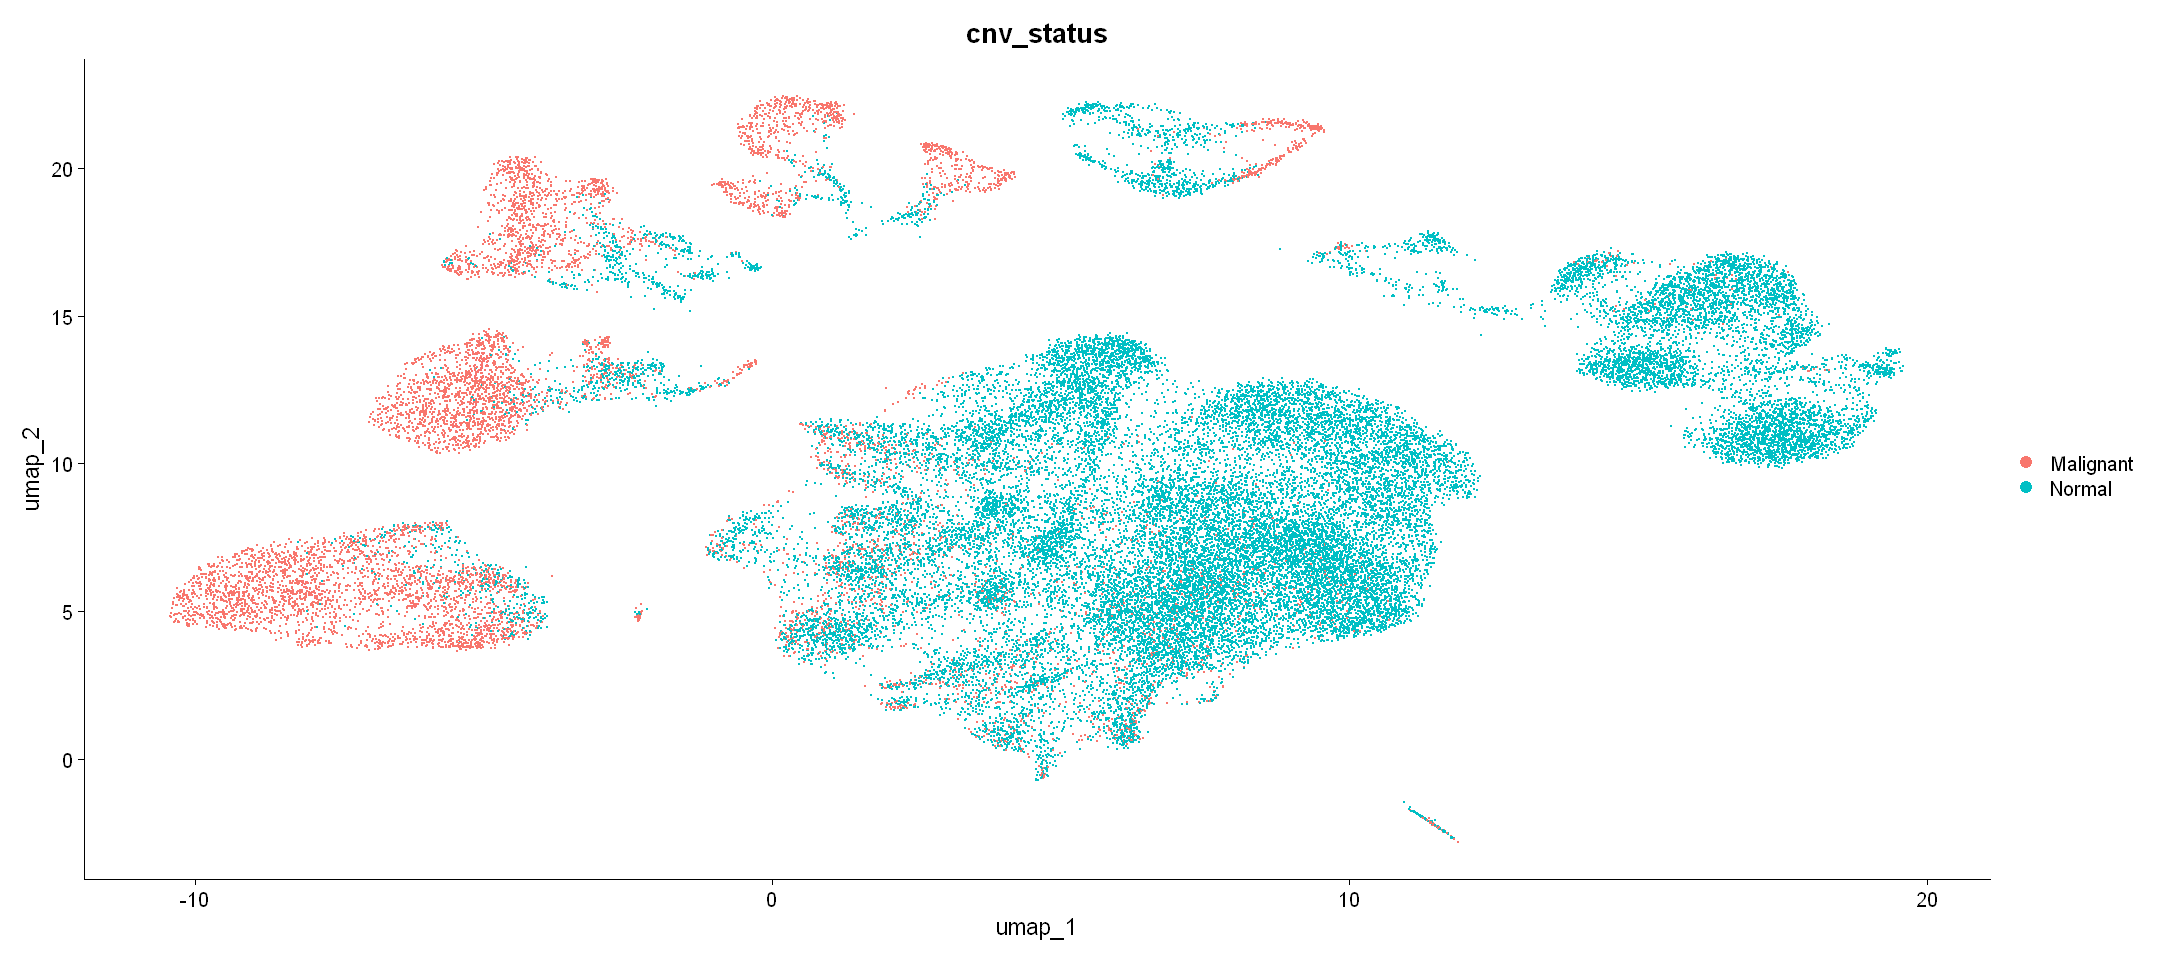

In [38]:
DimPlot(scRNA,reduction = 'umap',group.by = "cnv_status")